In [195]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [196]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import math
sns.set(style='darkgrid')

# Data Importing

In [198]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 



# Data Exploratery and Visualization

In [199]:
data = X.copy()
data.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible           2.0         std   
1            front           rwd  convertible           2.0         std   
2            front           rwd    hatchback           2.0         std   
3            front           fwd        sedan           4.0         std   
4            front           4wd        sedan           4.0         std   

  fuel-type         make normalized-losses  
0       gas  alfa-romero               NaN  
1       gas  alfa-romero               NaN  
2       gas  alfa-romero               NaN  
3       gas         audi             164.0  
4       gas         audi             164.0  

[5 rows x 25 columns]

In [200]:
# Price is the target so, will move it to the end.
target = data.pop('price')
data.insert(len(data.columns),'price',target)
data.head()

highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  stroke  \
0           27        21    5000.0       111.0                9.0    2.68   
1           27        21    5000.0       111.0                9.0    2.68   
2           26        19    5000.0       154.0                9.0    3.47   
3           30        24    5500.0       102.0               10.0    3.40   
4           22        18    5500.0       115.0                8.0    3.40   

   bore fuel-system  engine-size  num-of-cylinders  ... wheel-base  \
0  3.47        mpfi          130                 4  ...       88.6   
1  3.47        mpfi          130                 4  ...       88.6   
2  2.68        mpfi          152                 6  ...       94.5   
3  3.19        mpfi          109                 4  ...       99.8   
4  3.19        mpfi          136                 5  ...       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible           2.0         std   
1            front           rwd  convertible           2.0         std   
2            front           rwd    hatchback           2.0         std   
3            front           fwd        sedan           4.0         std   
4            front           4wd        sedan           4.0         std   

  fuel-type         make normalized-losses    price  
0       gas  alfa-romero               NaN  13495.0  
1       gas  alfa-romero               NaN  16500.0  
2       gas  alfa-romero               NaN  16500.0  
3       gas         audi             164.0  13950.0  
4       gas         audi             164.0  17450.0  

[5 rows x 25 columns]

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   highway-mpg        205 non-null    int64  
 1   city-mpg           205 non-null    int64  
 2   peak-rpm           203 non-null    float64
 3   horsepower         203 non-null    float64
 4   compression-ratio  205 non-null    float64
 5   stroke             201 non-null    float64
 6   bore               201 non-null    float64
 7   fuel-system        205 non-null    object 
 8   engine-size        205 non-null    int64  
 9   num-of-cylinders   205 non-null    int64  
 10  engine-type        205 non-null    object 
 11  curb-weight        205 non-null    int64  
 12  height             205 non-null    float64
 13  width              205 non-null    float64
 14  length             205 non-null    float64
 15  wheel-base         205 non-null    float64
 16  engine-location    205 non

* 25 columns with 205 row
* 17 numerical columns and 8 object columns

In [202]:
unique_data = data.nunique()
unique_data

highway-mpg           30
city-mpg              29
peak-rpm              23
horsepower            59
compression-ratio     32
stroke                36
bore                  38
fuel-system            8
engine-size           44
num-of-cylinders       7
engine-type            7
curb-weight          171
height                49
width                 44
length                75
wheel-base            53
engine-location        2
drive-wheels           3
body-style             5
num-of-doors           2
aspiration             2
fuel-type              2
make                  22
normalized-losses     51
price                186
dtype: int64

I will consider that any column less than 10 unique values is a categorical column else: will be continous data

In [203]:
def split_data(data, categorical_threshold):
    numerical_data = data.select_dtypes(include=['number'])
    object_data = data.select_dtypes(include=['object'])
    unique_data = data.nunique()
    cat_cols = unique_data[unique_data <= categorical_threshold].index
    cont_cols = unique_data[unique_data > categorical_threshold].index
    return numerical_data, object_data, cat_cols, cont_cols

In [204]:
numerical_data, object_data, cat_cols, cont_cols = split_data(data, 10)

In [205]:
# print(numerical_data.head())
# print(object_data.head())
print(len(numerical_data.columns))
print(len(object_data.columns))
# print(cat_cols, cont_cols)
print(len(cat_cols))
print(len(cont_cols))

17
8
9
16


* There are 17 numerical columns
* There are 8 object columns
* There are 10 categrocial columns
* There are 15 continuous columns

In [206]:
data.isnull().sum()

highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
price                 4
dtype: int64

columns that include null values are : 

* price
* peak-rpm
* horsepower
* stroke
* bore
* num-of-doors
* normalized-losses

**Plotting the null values using heatmap**

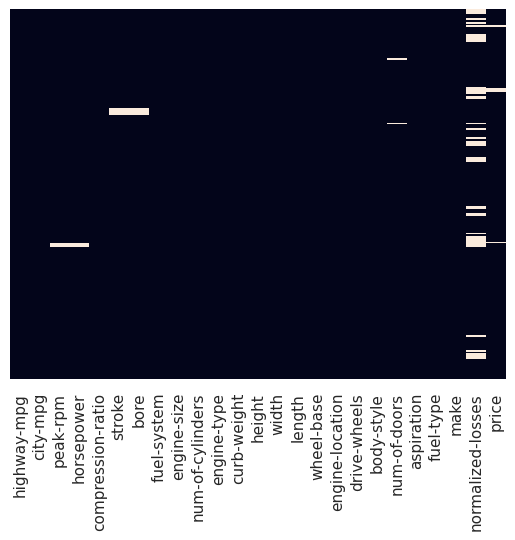

In [207]:
nullmap = data.isnull()
sns.heatmap(nullmap, annot=False, cbar= False, yticklabels= False);

In [208]:
data.describe().T

count          mean          std      min      25%  \
highway-mpg        205.0     30.751220     6.886443    16.00    25.00   
city-mpg           205.0     25.219512     6.542142    13.00    19.00   
peak-rpm           203.0   5125.369458   479.334560  4150.00  4800.00   
horsepower         203.0    104.256158    39.714369    48.00    70.00   
compression-ratio  205.0     10.142537     3.972040     7.00     8.60   
stroke             201.0      3.255423     0.316717     2.07     3.11   
bore               201.0      3.329751     0.273539     2.54     3.15   
engine-size        205.0    126.907317    41.642693    61.00    97.00   
num-of-cylinders   205.0      4.380488     1.080854     2.00     4.00   
curb-weight        205.0   2555.565854   520.680204  1488.00  2145.00   
height             205.0     53.724878     2.443522    47.80    52.00   
width              205.0     65.907805     2.145204    60.30    64.10   
length             205.0    174.049268    12.337289   141.10   166.30   
wheel-base         205.0     98.756585     6.021776    86.60    94.50   
num-of-doors       203.0      3.123153     0.994841     2.00     2.00   
normalized-losses  164.0    122.000000    35.442168    65.00    94.00   
price              201.0  13207.129353  7947.066342  5118.00  7775.00   

                        50%       75%       max  
highway-mpg           30.00     34.00     54.00  
city-mpg              24.00     30.00     49.00  
peak-rpm            5200.00   5500.00   6600.00  
horsepower            95.00    116.00    288.00  
compression-ratio      9.00      9.40     23.00  
stroke                 3.29      3.41      4.17  
bore                   3.31      3.59      3.94  
engine-size          120.00    141.00    326.00  
num-of-cylinders       4.00      4.00     12.00  
curb-weight         2414.00   2935.00   4066.00  
height                54.10     55.50     59.80  
width                 65.50     66.90     72.30  
length               173.20    183.10    208.10  
wheel-base            97.00    102.40    120.90  
num-of-doors           4.00      4.00      4.00  
normalized-losses    115.00    150.00    256.00  
price              10295.00  16500.00  45400.00

* There are outliers in some columns by comparing the values of mean and median

**Plotting the outliers using boxplot**

In [209]:
def columns_boxplot(data):
    l = len(data.columns)
    plt.figure(figsize=(20, 30))
    for i in range(l):
        plt.subplot(l, 1, i + 1)
        sns.boxplot(x=data[data.columns[i]])
        plt.title(f'BoxPlot of {data.columns[i]}', fontsize=22, color='darkblue')

    plt.tight_layout()
    plt.show()

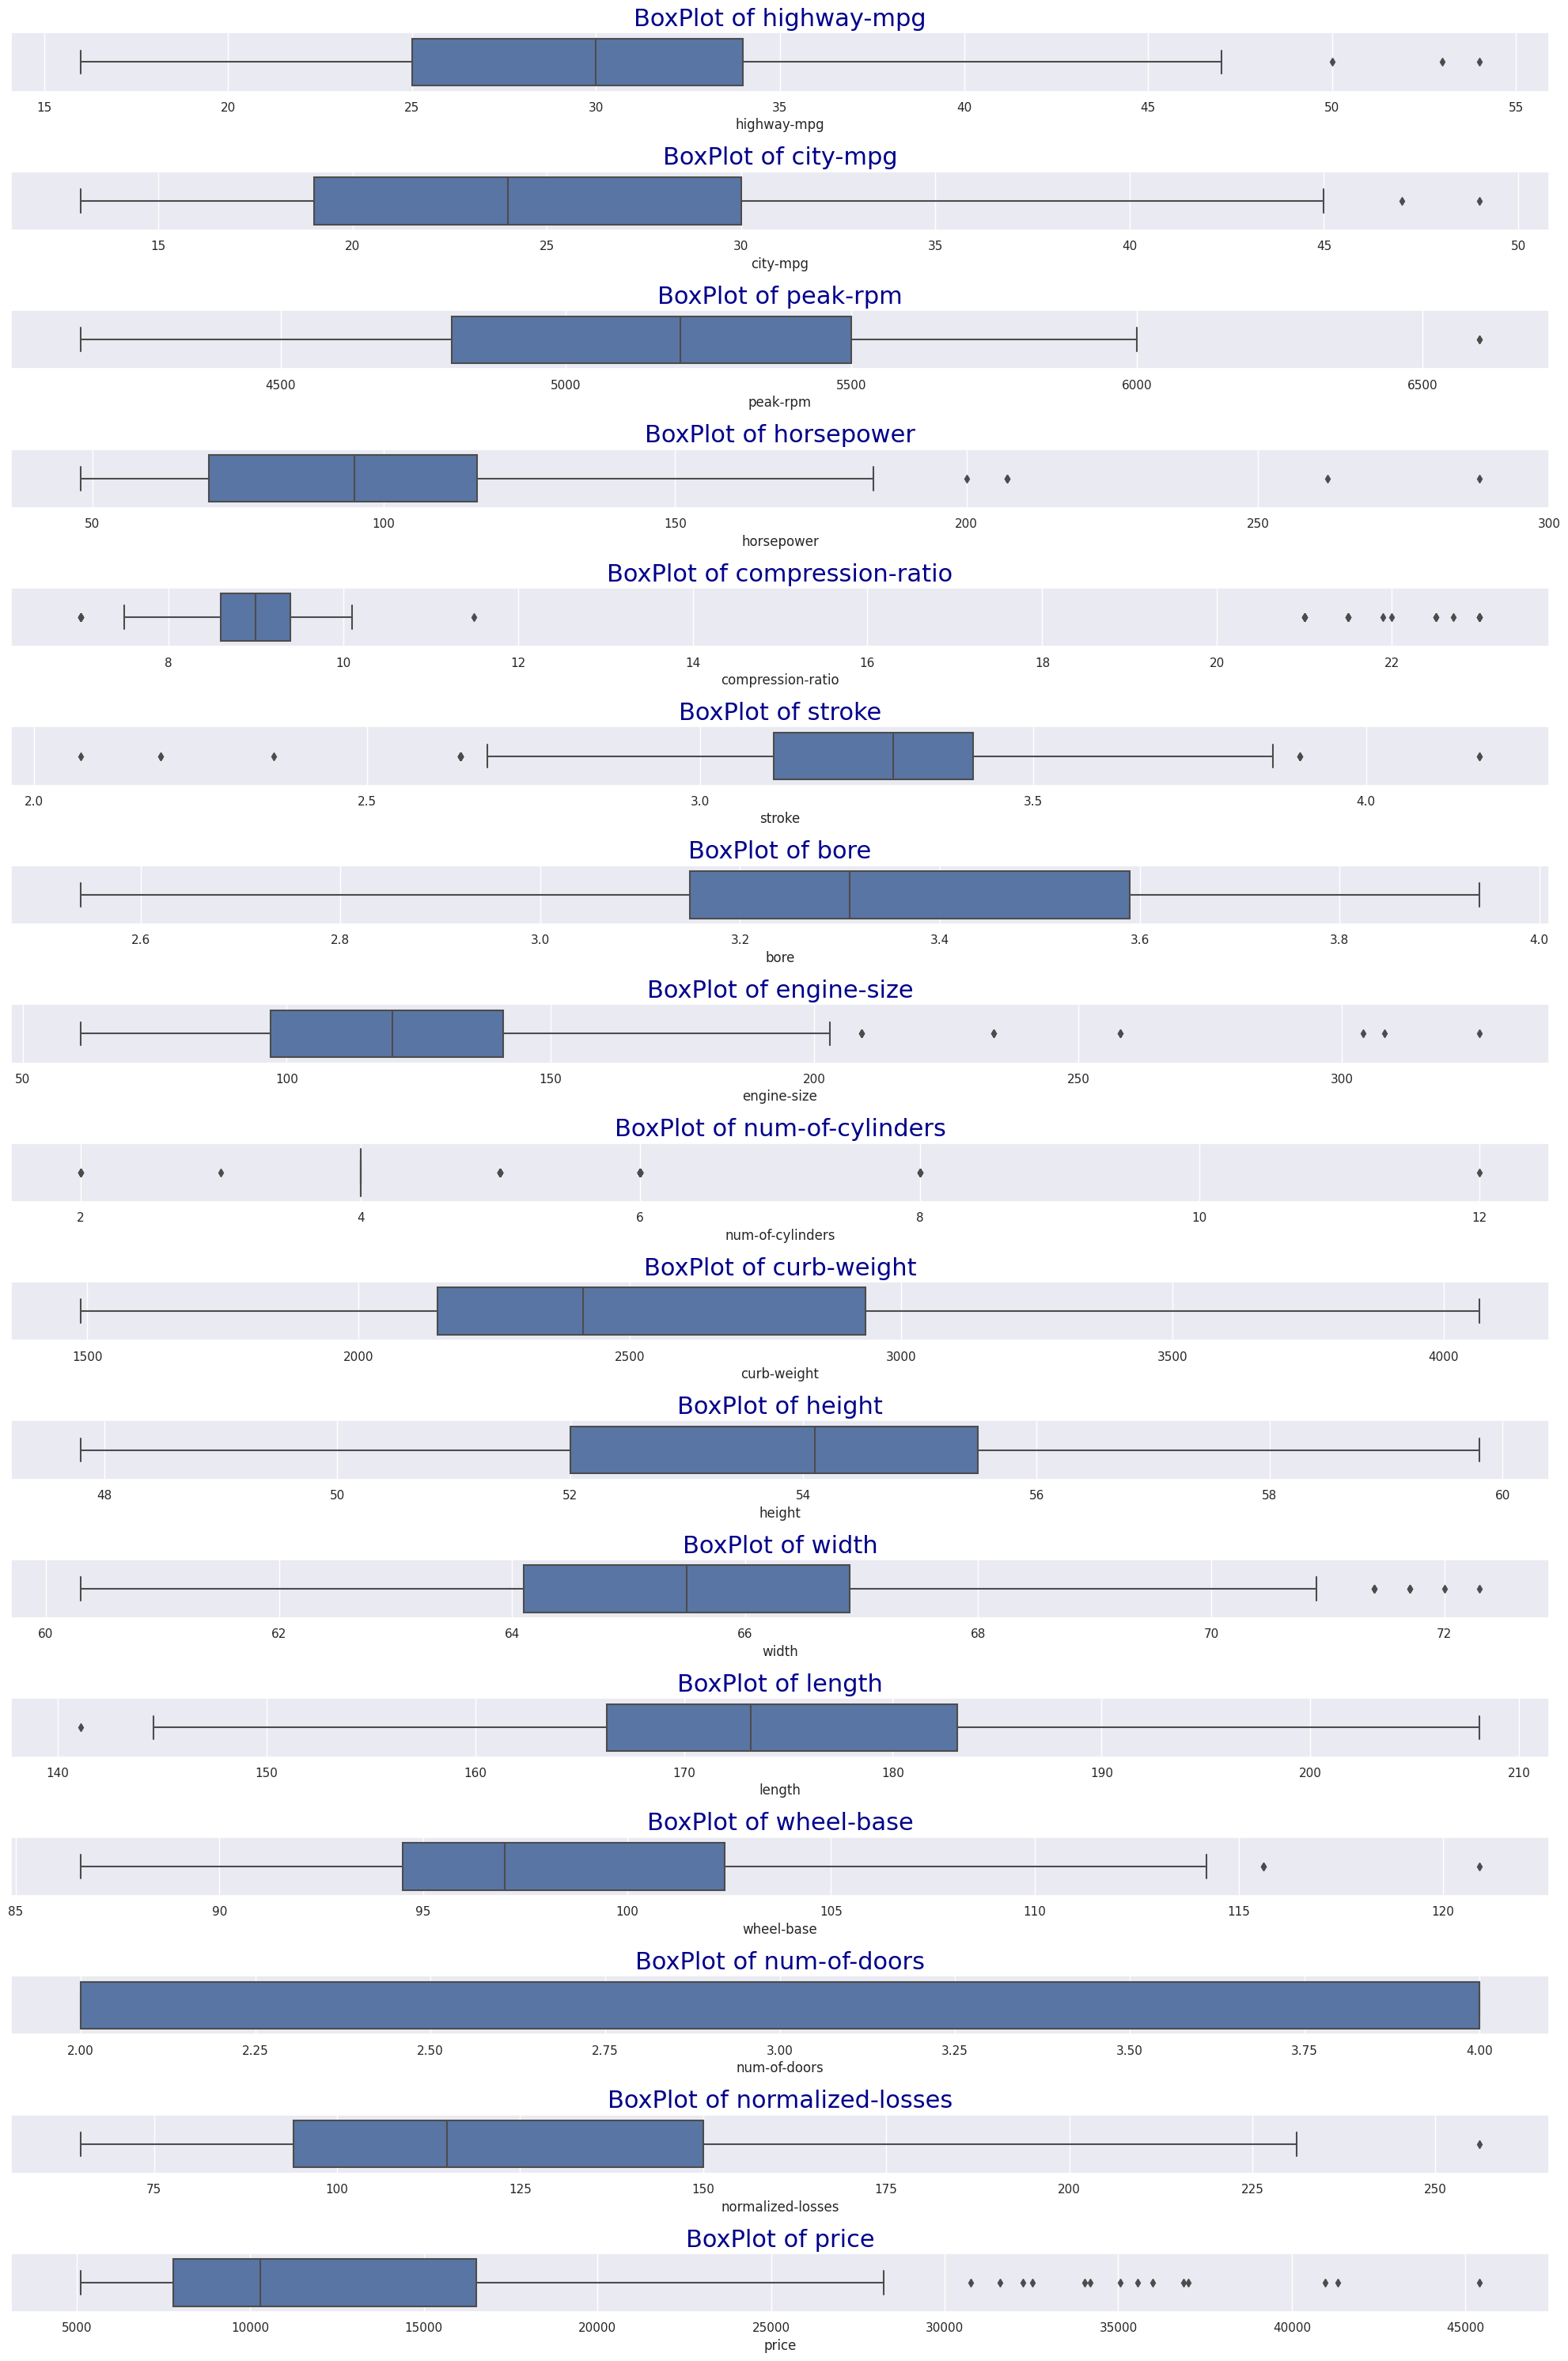

In [210]:
columns_boxplot(numerical_data)

In [211]:
skew_data = numerical_data.skew().sort_values(ascending=False)
skew_data

num-of-cylinders     2.817459
compression-ratio    2.610862
engine-size          1.947655
price                1.809675
horsepower           1.391029
wheel-base           1.050214
width                0.904003
normalized-losses    0.765976
curb-weight          0.681398
city-mpg             0.663704
highway-mpg          0.539997
length               0.155954
peak-rpm             0.073237
height               0.063123
bore                 0.020016
num-of-doors        -0.250046
stroke              -0.683122
dtype: float64

In [212]:
right_skewed = skew_data[skew_data>0.5]
left_skewed = skew_data[skew_data<-0.5]
print(len(right_skewed))
print(len(left_skewed))

11
1


* There are 11 right skewed columns --> will process them using log transformation
* There is 1 left skewed column --> will process it using square transformation

**Plotting the columns using histoplot to introduce skewed numerical columns**

In [213]:
# function to plot the histplot for each column
def columns_histplot(data):
    c = 3
    r = math.ceil(len(data.columns)/c)
    plt.figure(figsize=(20,5*r))
    l = len(data.columns)
    for i in range(l):
        plt.subplot(r, c, i + 1)
        sns.histplot(data[data.columns[i]], bins=10, kde=True)
        plt.title(f'HistPlot of {data.columns[i]}', fontsize=14, color='darkblue')
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

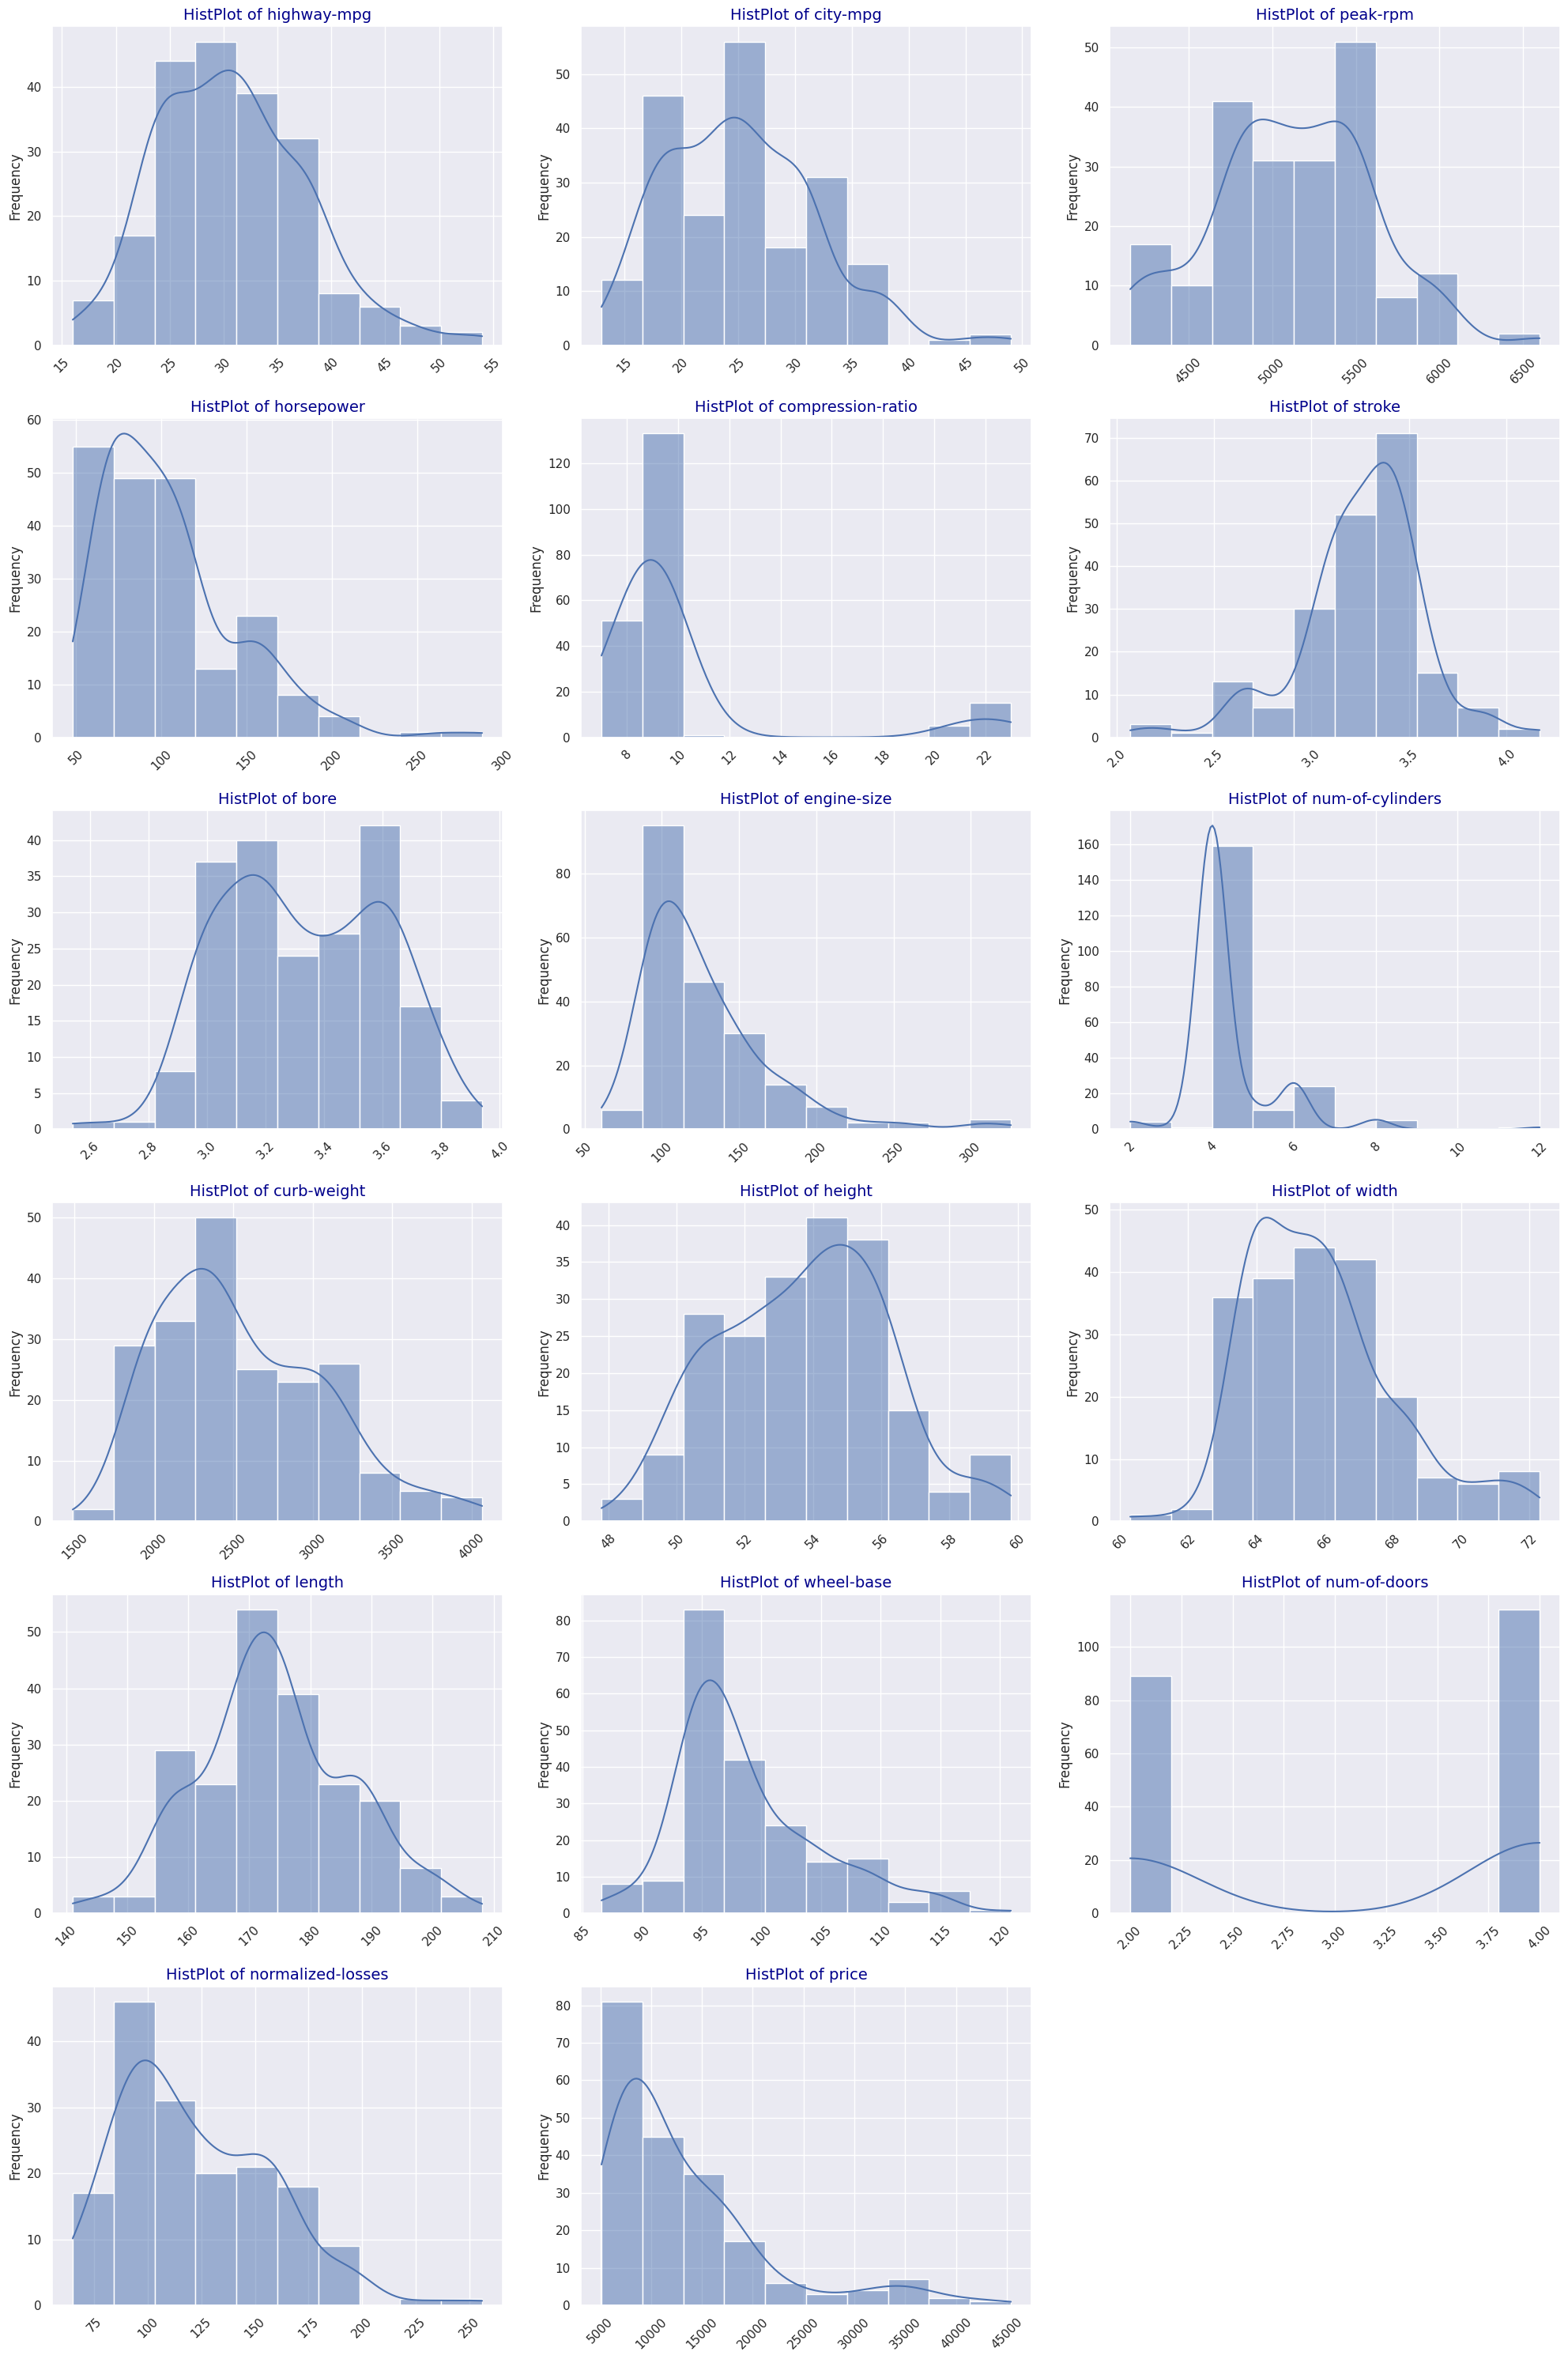

In [214]:
columns_histplot(numerical_data)

**Plotting Categorical Columns**

In [215]:
def columns_pie(data):
    c = 3
    r = math.ceil(len(data.columns)/c)
    plt.figure(figsize=(100,100))
    l = len(data.columns)
    for i in range(l):
        plt.subplot(r, c, i+1)
        unique_values = data[data.columns[i]].unique()
        label = unique_values if not pd.isnull(unique_values).any() else unique_values[:-1]        
        plt.pie(data[data.columns[i]].value_counts(normalize=True), autopct='%1.0f%%', labels=label, textprops={'fontsize': 48})
        plt.title(f'Pie Chart of {data.columns[i]}', fontsize=64)
    plt.tight_layout()
    plt.show()
    

In [216]:
columns_pie(data[cat_cols])

* Using these Pie charts, we can know what is majority category in each column

**Plotting Continuous columns**

In [217]:
def columns_scatterplot(data, target_col):
    c = 3
    r = math.ceil(len(data.columns)/c)
    plt.figure(figsize=(20,5*r))
    l = len(data.columns)
    for i in range(l):
        plt.subplot(r, c, i + 1)
        sns.scatterplot(x = data[data.columns[i]], y =data[target_col])
        plt.title(f'ScatterPlot of {data.columns[i]} with {target_col}', fontsize=22, color='darkblue')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

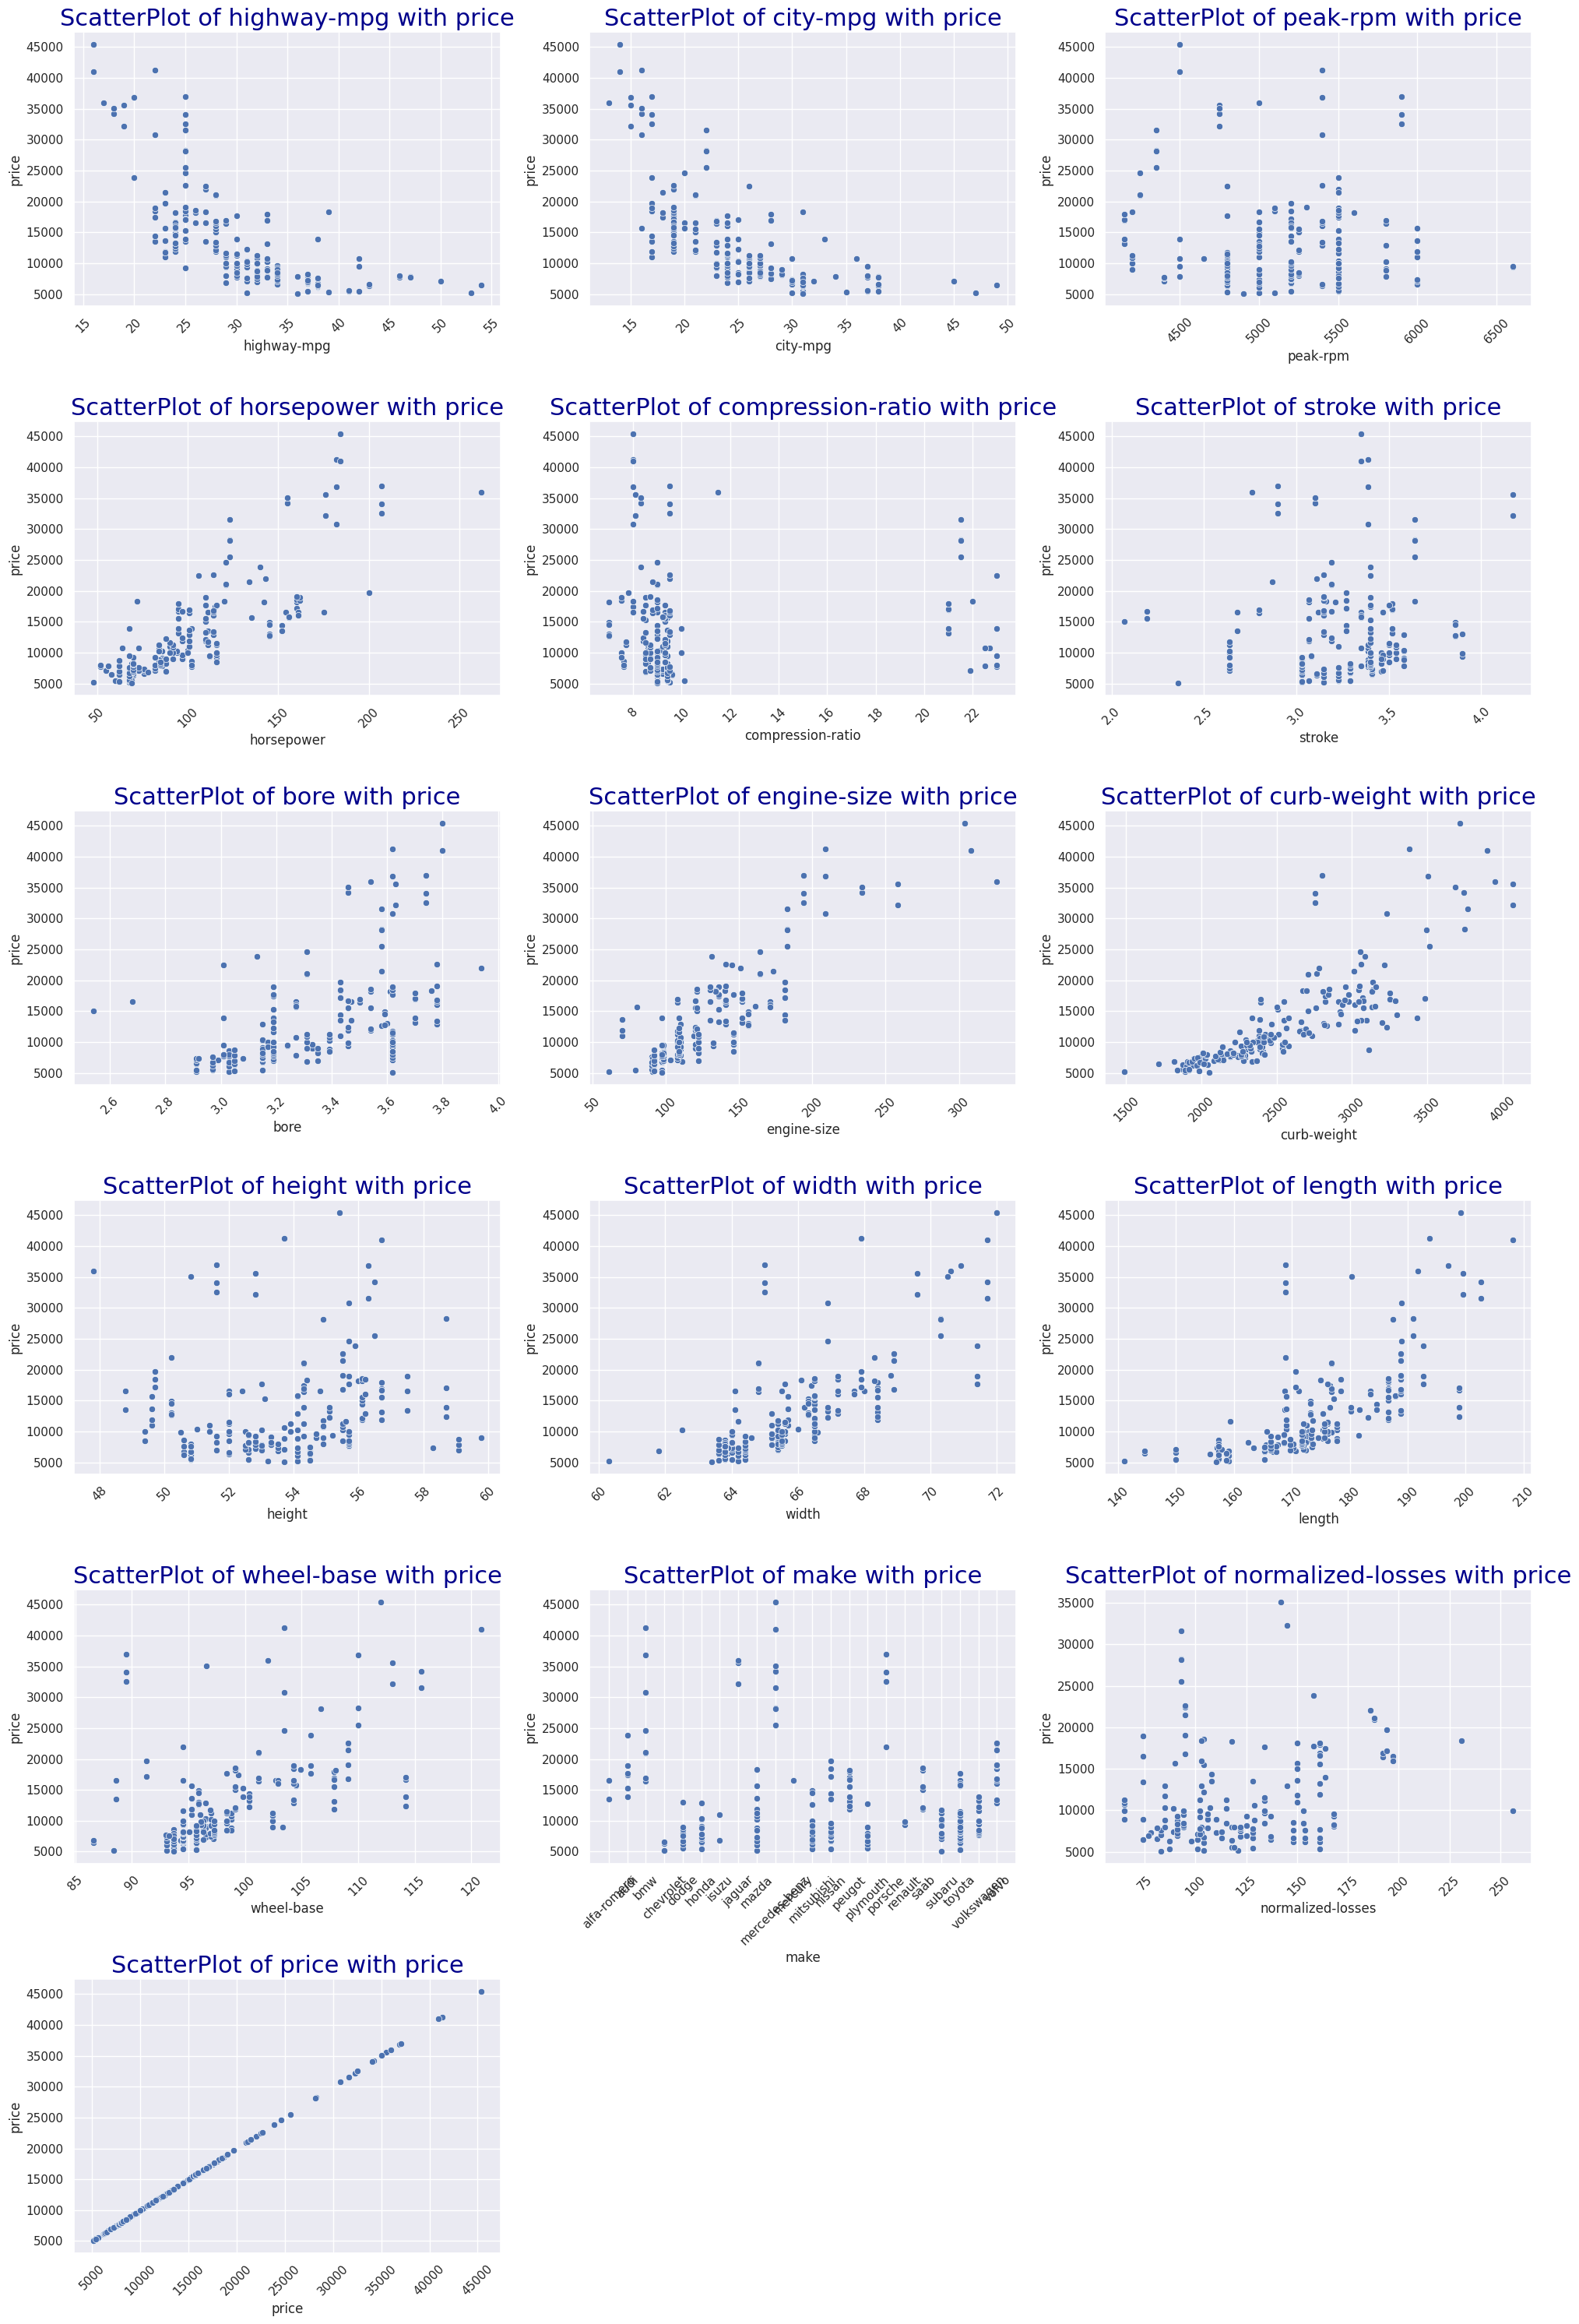

In [218]:
columns_scatterplot(data[cont_cols], 'price')


In [219]:
def columns_lineplot(data, target_col):
    c = 3
    r = math.ceil(len(data.columns)/c)
    plt.figure(figsize=(20,5*r))
    l = len(data.columns)
    for i in range(l):
        plt.subplot(r, c, i + 1)
        sns.lineplot(x=data[data.columns[i]],y=data[target_col])
        plt.title(f'Line Plot of {data.columns[i]} with {target_col}', fontsize=22, color='darkblue')
        plt.xticks(rotation=45)
        

    plt.tight_layout()
    plt.show()

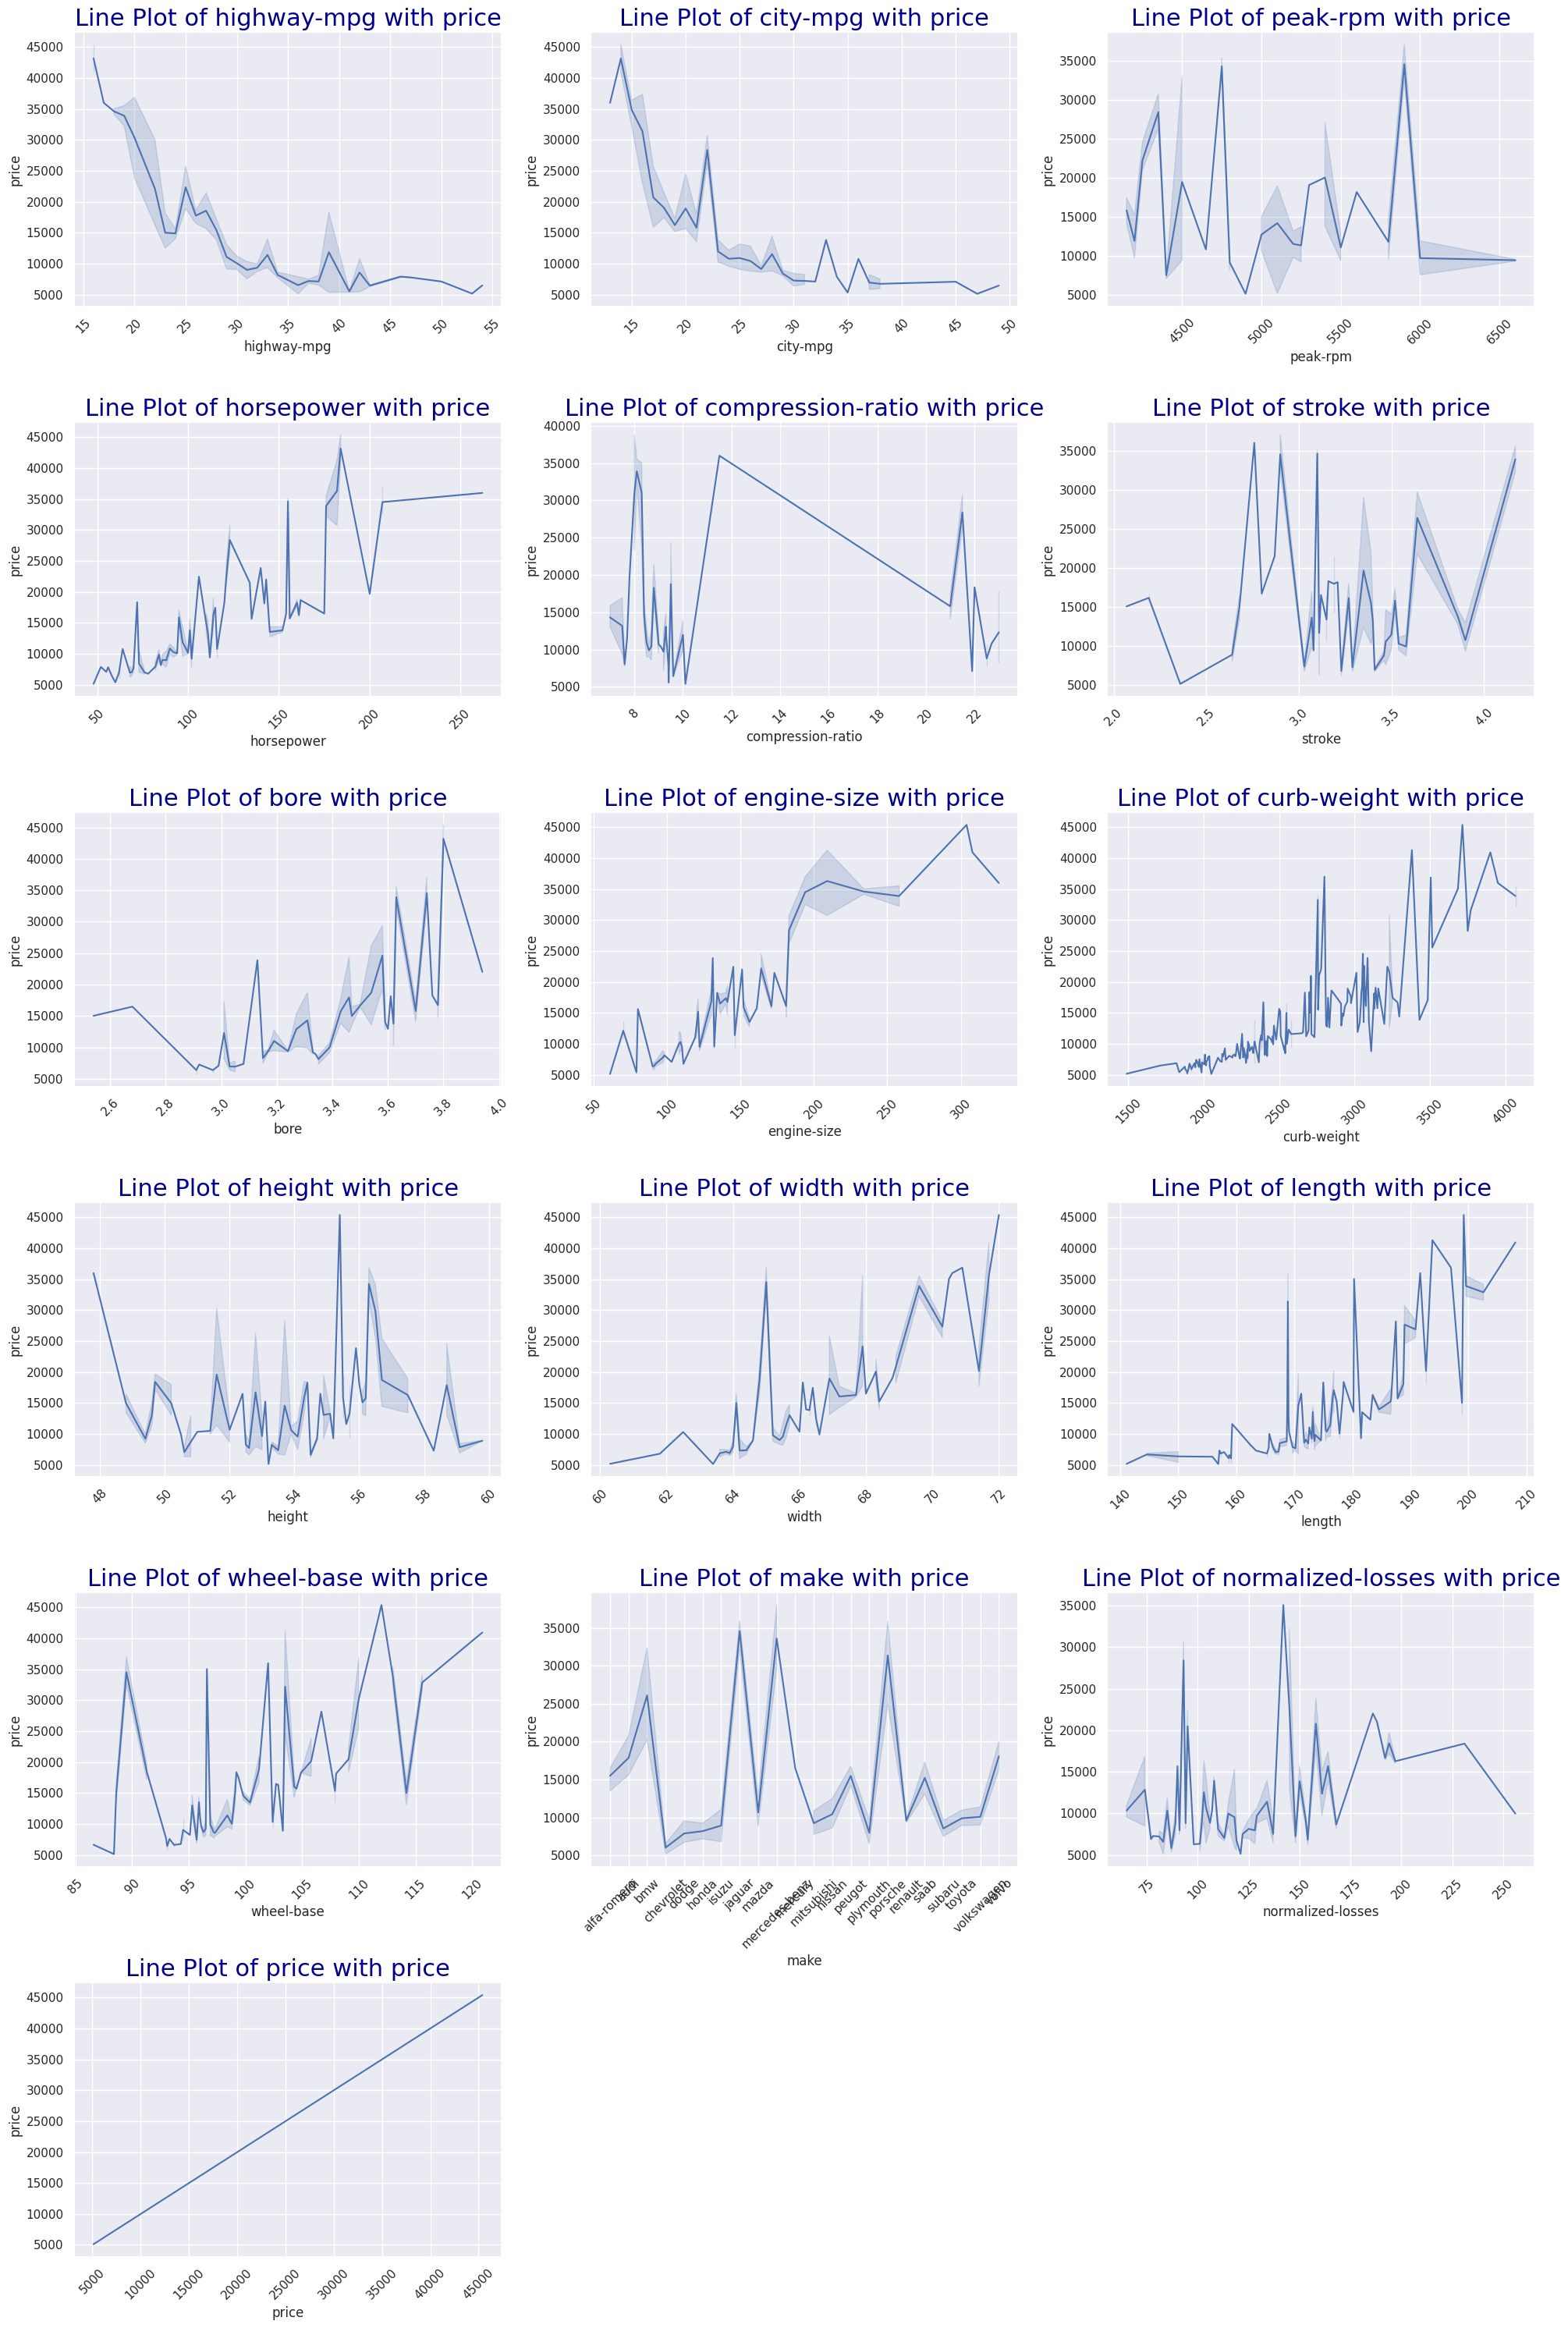

In [220]:
columns_lineplot(data[cont_cols], 'price')

Positive correlation with price: 

* horse power
* engine size
* curb weight 
* width 
* length

Negative correlation with price: 

* highway-mpg
* city-mpg


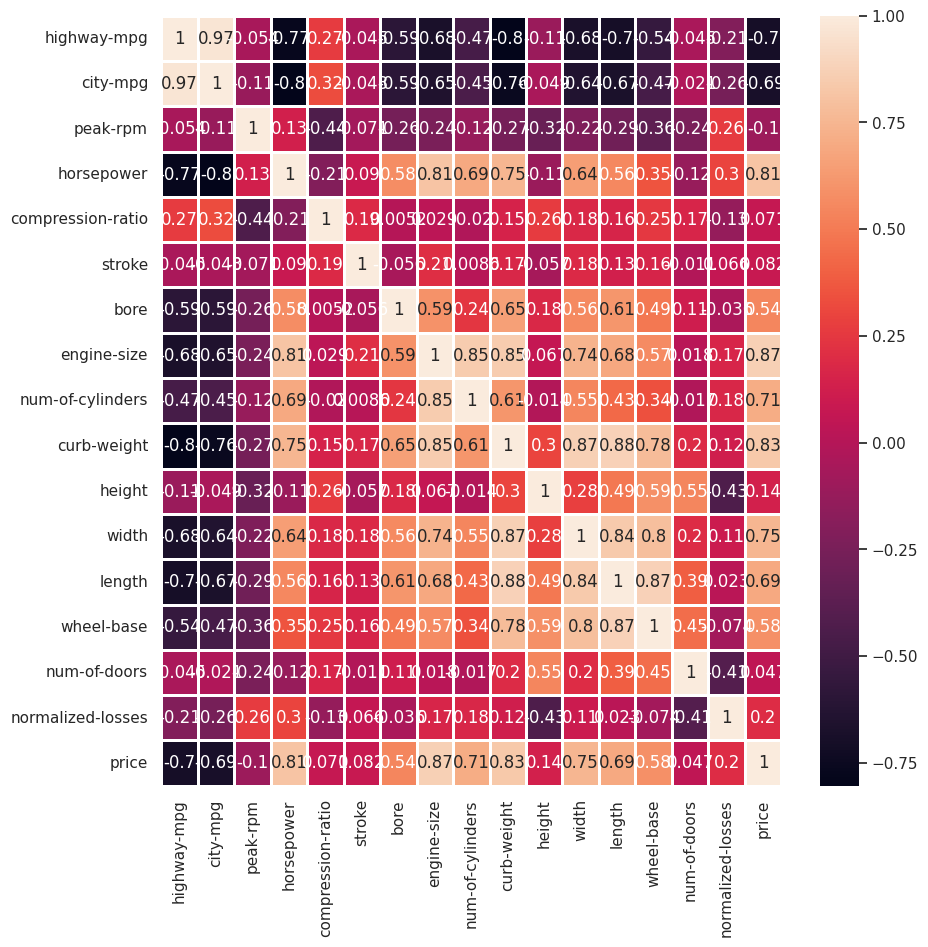

In [221]:
corr = numerical_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot =True, cmap='rocket', linewidth=1);

**From the past representation of the heat map, we have the following correlations:**

correlations > 0.8: (to drop one of 2 columns)
* highway - city --> highway
* horse power - engine size --> engine size 
* num of cylinders - engine size --> engine size
* curb weight - engine size --> engine size
* curb weight - width --> curb weight
* curb weight - length --> curb weight
* width - wheel base --> wheel base
* width - length --> width
* length - wheel base --> wheel base


-Dropped columns are : highway, engine size, curb weight, wheel base, width


+ve correlation:
* city - highway
* curb weight - engine size
* horse power - curb weight
* length - curb weight
* width - curb weight
* wheel base -- curb weight
* length - width
* wheel base - length

-ve correlation:
* horse power - highway
* curb weight - highway
* length - highway
* horse power - city
* city - curb weight
* highway - width
* city - width 
* city - length

# Data Cleaning and Preprocessing

**Drop strongly correlated columns**

highway, engine size, curb weight, wheel base, width


In [222]:
def columns_drop(data, cols):
    data = data.drop(columns = cols, axis=1)
    data = data.reset_index(drop=True)
    return data

In [223]:
cols = ['highway-mpg', 'engine-size', 'curb-weight', 'wheel-base', 'width']
data = columns_drop(data, cols)
numerical_data, object_data, cat_cols, cont_cols = split_data(data,10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city-mpg           205 non-null    int64  
 1   peak-rpm           203 non-null    float64
 2   horsepower         203 non-null    float64
 3   compression-ratio  205 non-null    float64
 4   stroke             201 non-null    float64
 5   bore               201 non-null    float64
 6   fuel-system        205 non-null    object 
 7   num-of-cylinders   205 non-null    int64  
 8   engine-type        205 non-null    object 
 9   height             205 non-null    float64
 10  length             205 non-null    float64
 11  engine-location    205 non-null    object 
 12  drive-wheels       205 non-null    object 
 13  body-style         205 non-null    object 
 14  num-of-doors       203 non-null    float64
 15  aspiration         205 non-null    object 
 16  fuel-type          205 non

**Replacing null values with the median and mode**

In [224]:
def columns_fillna(data):
    for col in data.columns:
        if col in (data.select_dtypes(include=['number'])):
            data[col] = data[col].fillna(data[col].median())
        elif col in (data.select_dtypes(include=['object'])):
            data[col] = data[col].fillna(data[col].mode()[0])

    return data

In [225]:
data.isnull().sum()

city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
num-of-cylinders      0
engine-type           0
height                0
length                0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
price                 4
dtype: int64

In [226]:
data = columns_fillna(data)
data.isnull().sum()

city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
num-of-cylinders     0
engine-type          0
height               0
length               0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
price                0
dtype: int64

**Delete duplicated rows**

In [227]:
data.duplicated().sum()

0

In [228]:
data[data.duplicated()].index

Index([], dtype='int64')

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city-mpg           205 non-null    int64  
 1   peak-rpm           205 non-null    float64
 2   horsepower         205 non-null    float64
 3   compression-ratio  205 non-null    float64
 4   stroke             205 non-null    float64
 5   bore               205 non-null    float64
 6   fuel-system        205 non-null    object 
 7   num-of-cylinders   205 non-null    int64  
 8   engine-type        205 non-null    object 
 9   height             205 non-null    float64
 10  length             205 non-null    float64
 11  engine-location    205 non-null    object 
 12  drive-wheels       205 non-null    object 
 13  body-style         205 non-null    object 
 14  num-of-doors       205 non-null    float64
 15  aspiration         205 non-null    object 
 16  fuel-type          205 non

In [230]:
data = data.drop(data[data.duplicated()].index, axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city-mpg           205 non-null    int64  
 1   peak-rpm           205 non-null    float64
 2   horsepower         205 non-null    float64
 3   compression-ratio  205 non-null    float64
 4   stroke             205 non-null    float64
 5   bore               205 non-null    float64
 6   fuel-system        205 non-null    object 
 7   num-of-cylinders   205 non-null    int64  
 8   engine-type        205 non-null    object 
 9   height             205 non-null    float64
 10  length             205 non-null    float64
 11  engine-location    205 non-null    object 
 12  drive-wheels       205 non-null    object 
 13  body-style         205 non-null    object 
 14  num-of-doors       205 non-null    float64
 15  aspiration         205 non-null    object 
 16  fuel-type          205 non

**Handle Outliers**

In [231]:
numerical_data, object_data, cat_cols, cont_cols = split_data(data, 10)

In [232]:
def columns_outlier(data):
    for col in data.columns:
        if col in (data.select_dtypes(include=['number'])):
            q1, q3 = data[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outlier = (data[col] < lower) | (data[col] > upper)
            data = data[~outlier]
            
#           I will not delete the non-numerical outliers because the data not that large.
#         elif col in (data.select_dtypes(include=['object'])):
#             for value in data[col].unique():
#                 value_len = len(data[data[col]==value])
#                 if value_len < len(data.columns):
#                     data = data.drop(data[data[col]==value].index, axis=0)

        data.reset_index(drop=True, inplace=True)
    return data

In [233]:
# to check how many object outliers will be deleted 
for col in object_data:
    print(col)
    for value in data[col].unique():
        print(len(data[data[col]==value]))

fuel-system
94
66
1
11
1
3
20
9
engine-type
12
13
148
12
4
15
1
engine-location
202
3
drive-wheels
76
120
9
body-style
6
70
96
25
8
aspiration
168
37
fuel-type
185
20
make
3
7
8
3
9
13
4
3
17
8
1
13
18
11
7
5
2
6
12
32
12
11


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city-mpg           205 non-null    int64  
 1   peak-rpm           205 non-null    float64
 2   horsepower         205 non-null    float64
 3   compression-ratio  205 non-null    float64
 4   stroke             205 non-null    float64
 5   bore               205 non-null    float64
 6   fuel-system        205 non-null    object 
 7   num-of-cylinders   205 non-null    int64  
 8   engine-type        205 non-null    object 
 9   height             205 non-null    float64
 10  length             205 non-null    float64
 11  engine-location    205 non-null    object 
 12  drive-wheels       205 non-null    object 
 13  body-style         205 non-null    object 
 14  num-of-doors       205 non-null    float64
 15  aspiration         205 non-null    object 
 16  fuel-type          205 non

In [235]:
data = columns_outlier(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city-mpg           106 non-null    int64  
 1   peak-rpm           106 non-null    float64
 2   horsepower         106 non-null    float64
 3   compression-ratio  106 non-null    float64
 4   stroke             106 non-null    float64
 5   bore               106 non-null    float64
 6   fuel-system        106 non-null    object 
 7   num-of-cylinders   106 non-null    int64  
 8   engine-type        106 non-null    object 
 9   height             106 non-null    float64
 10  length             106 non-null    float64
 11  engine-location    106 non-null    object 
 12  drive-wheels       106 non-null    object 
 13  body-style         106 non-null    object 
 14  num-of-doors       106 non-null    float64
 15  aspiration         106 non-null    object 
 16  fuel-type          106 non

**Handle Skewness**

In [236]:
# refresh data after outliers
numerical_data, object_data, cat_cols, cont_cols = split_data(data, 10)

In [237]:
skewed_data = numerical_data.skew().sort_values(ascending=False)
skewed_data

horsepower           1.183780
price                1.135540
bore                 0.861577
height               0.448263
city-mpg             0.408339
length               0.266649
normalized-losses    0.203281
num-of-cylinders     0.000000
peak-rpm            -0.177358
num-of-doors        -0.270326
stroke              -0.478100
compression-ratio   -1.091714
dtype: float64

In [238]:
right_skewed = skewed_data[skewed_data>0.6]
left_skewed = skewed_data[skewed_data<-0.5]
print(len(right_skewed))
print(len(left_skewed))

3
1


In [239]:
def columns_transformation(data):
    skewed_data = data.skew()
    right_skewed = skewed_data[skewed_data>=0.6]
    left_skewed = skewed_data[skewed_data<(-0.6)]
    for col in skewed_data.index:
        if col in right_skewed.index: # right skewed --> log transformer
            tr = ColumnTransformer(transformers = [('lg', FunctionTransformer(np.log1p), [col])])
            tr_type = 'Log'
        elif col in left_skewed.index: #left skewed --> square tranformer
            tr = ColumnTransformer(transformers = [('sq', FunctionTransformer(np.square), [col])])
            tr_type = 'Square'
        else:
            continue
        plt.figure(figsize=(15,6))
        col_tr = pd.DataFrame(tr.fit_transform(data))
        skew_before = data[col].skew()
        skew_after = col_tr[0].skew()
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {col} before Transformation", fontsize=15)
        sns.histplot(data[col], kde=True, color="red")
        
        data[col] = col_tr[0]
        plt.subplot(1,2,2)
        plt.title(f"Distribution of {col} after Transformation", fontsize=15)
        sns.histplot(data[col],bins=20, kde=True , legend=False)
        plt.xlabel(col)
        plt.show()
        print(f"Skewness was {round(skew_before,2)} before & now it is {round(skew_after,2)} after {tr_type} transformation.")
        
    return data


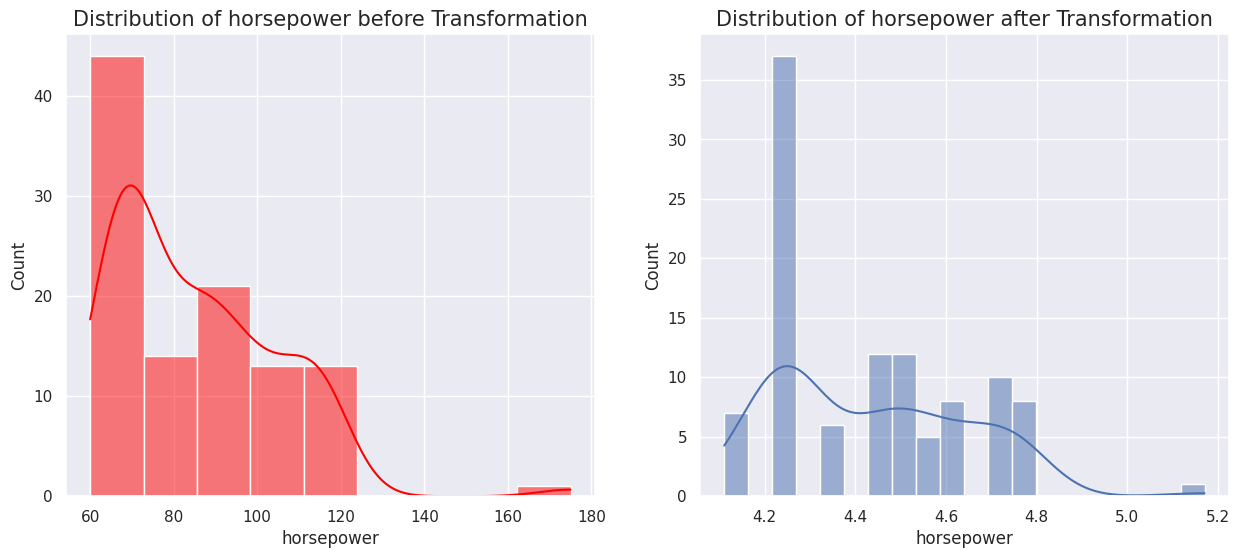

Skewness was 1.18 before & now it is 0.57 after Log transformation.


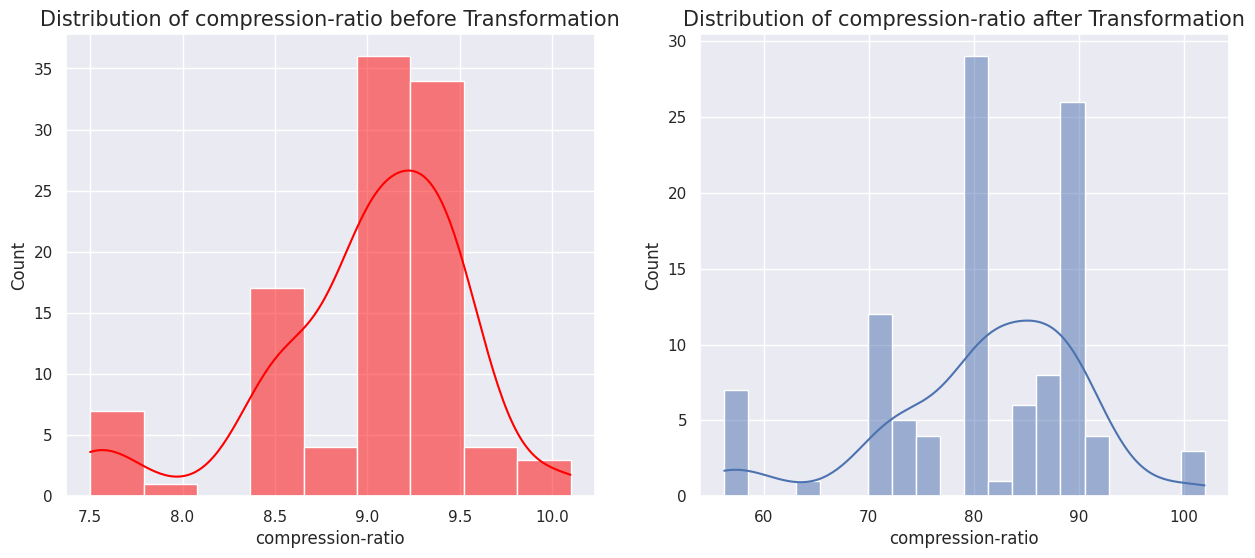

Skewness was -1.09 before & now it is -0.89 after Square transformation.


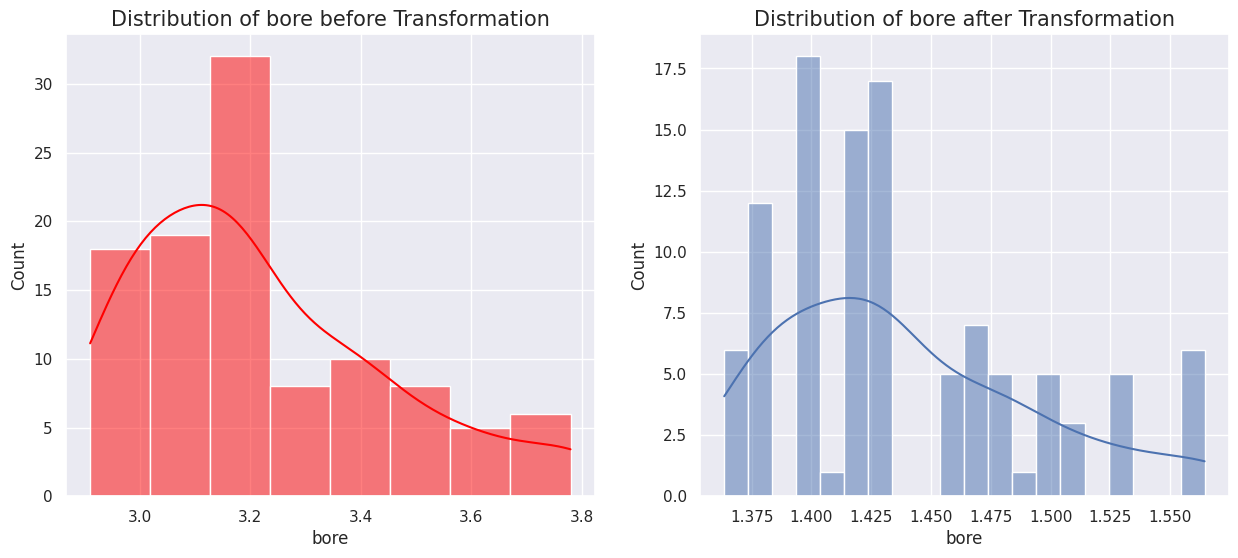

Skewness was 0.86 before & now it is 0.76 after Log transformation.


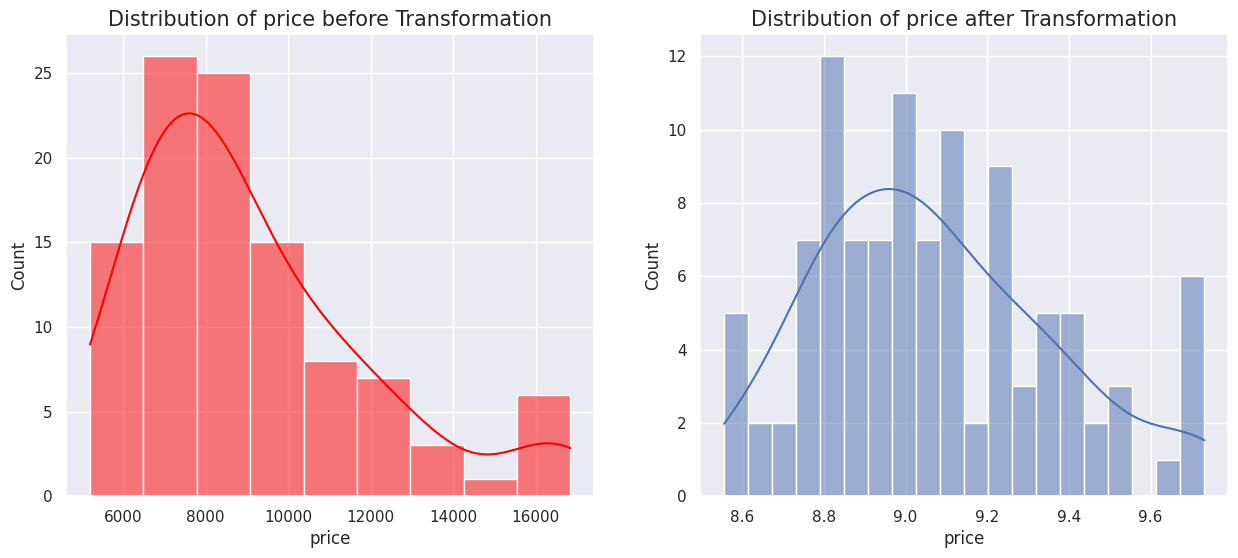

Skewness was 1.14 before & now it is 0.51 after Log transformation.


In [240]:
data[numerical_data.columns] = columns_transformation(numerical_data)

In [241]:
numerical_data, object_data, cat_cols, cont_cols = split_data(data, 10)
skewed_data = numerical_data.skew().sort_values(ascending=False)
right_skewed = skewed_data[skewed_data>0.6]
left_skewed = skewed_data[skewed_data<-0.5]
print(len(right_skewed))
print(len(left_skewed))

1
1


**Columns Encoding using Label Encoding**

In [242]:
def columns_lencoder(data):
    le = LabelEncoder()
    for col in data.columns:
        data[col] = le.fit_transform(data[col])
    return data

In [243]:
data[object_data.columns] = columns_lencoder(object_data)
data.head()

city-mpg  peak-rpm  horsepower  compression-ratio  stroke      bore  \
0        21    5000.0    4.718499              81.00    2.68  1.497388   
1        21    5000.0    4.718499              81.00    2.68  1.497388   
2        24    5500.0    4.634729             100.00    3.40  1.432701   
3        38    5400.0    4.262680              92.16    3.11  1.393766   
4        38    5400.0    4.262680              92.16    3.11  1.393766   

   fuel-system  num-of-cylinders  engine-type  height  length  \
0            2                 4            0    48.8   168.8   
1            2                 4            0    48.8   168.8   
2            2                 4            2    54.3   176.6   
3            1                 4            2    52.0   155.9   
4            1                 4            2    52.0   158.8   

   engine-location  drive-wheels  body-style  num-of-doors  aspiration  \
0                0             2           0           2.0           0   
1                0             2           0           2.0           0   
2                0             1           3           4.0           0   
3                0             1           2           2.0           0   
4                0             1           3           4.0           0   

   fuel-type  make  normalized-losses     price  
0          0     0              115.0  9.510149  
1          0     0              115.0  9.711176  
2          0     1              164.0  9.543306  
3          0     2               98.0  8.747670  
4          0     2               81.0  8.791182

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city-mpg           106 non-null    int64  
 1   peak-rpm           106 non-null    float64
 2   horsepower         106 non-null    float64
 3   compression-ratio  106 non-null    float64
 4   stroke             106 non-null    float64
 5   bore               106 non-null    float64
 6   fuel-system        106 non-null    int64  
 7   num-of-cylinders   106 non-null    int64  
 8   engine-type        106 non-null    int64  
 9   height             106 non-null    float64
 10  length             106 non-null    float64
 11  engine-location    106 non-null    int64  
 12  drive-wheels       106 non-null    int64  
 13  body-style         106 non-null    int64  
 14  num-of-doors       106 non-null    float64
 15  aspiration         106 non-null    int64  
 16  fuel-type          106 non

**Data Splitting**

In [268]:
X = data.drop(data.columns[-1], axis=1)
y = data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 19)
(27, 19)
(79,)
(27,)


**Feature Scaling**

In [269]:
X_train.head()

city-mpg  peak-rpm  horsepower  compression-ratio  stroke      bore  \
73        35    4800.0    4.143135              81.00    3.03  1.398717   
15        30    6000.0    4.343805              84.64    3.41  1.363537   
77        27    4800.0    4.143135              81.00    3.03  1.398717   
36        26    4800.0    4.442651              73.96    3.39  1.479329   
88        24    4800.0    4.762174              86.49    3.50  1.530395   

    fuel-system  num-of-cylinders  engine-type  height  length  \
73            1                 4            2    54.5   158.7   
15            0                 4            2    52.6   150.0   
77            1                 4            2    59.1   169.7   
36            1                 4            2    53.7   177.8   
88            2                 4            2    52.0   176.2   

    engine-location  drive-wheels  body-style  num-of-doors  aspiration  \
73                0             1           2           2.0           0   
15                0             1           2           2.0           0   
77                0             0           4           4.0           0   
36                0             1           2           2.0           0   
88                0             2           2           2.0           0   

    fuel-type  make  normalized-losses  
73          0    13               87.0  
15          0     4              101.0  
77          0    13               81.0  
36          0     6              129.0  
88          0    13              134.0

In [270]:
rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.transform(X_test)
pd.DataFrame(X_train)

0         1         2         3         4         5    6    7    8   \
0   1.142857 -0.571429 -0.785399 -0.142857 -1.000000 -0.421571  0.0  0.0  0.0   
1   0.428571  1.142857 -0.259196  0.144436  0.461538 -0.857975 -1.0  0.0  0.0   
2   0.000000 -0.571429 -0.785399 -0.142857 -1.000000 -0.421571  0.0  0.0  0.0   
3  -0.142857 -0.571429  0.000000 -0.698500  0.384615  0.578429  0.0  0.0  0.0   
4  -0.428571 -0.571429  0.837860  0.290450  0.807692  1.211898  1.0  0.0  0.0   
..       ...       ...       ...       ...       ...       ...  ...  ...  ...   
74 -0.857143  0.071429  0.699816  0.290450 -0.846154  0.995211  1.0  0.0  0.0   
75  1.571429  0.428571 -0.869995  1.515391 -0.846154 -0.857975 -1.0  0.0  0.0   
76  0.000000 -1.428571  0.235864 -0.561957  0.961538  0.350283  1.0  0.0  0.0   
77  0.571429  0.000000 -0.509121  0.438043  0.000000 -0.118994  0.0  0.0  0.0   
78 -0.571429  0.285714  0.792648  0.587214 -0.538462  1.634239  1.0  0.0  0.0   

         9         10   11   12   13   14   15   16     17        18  
0   0.18750 -0.749186  0.0  0.0 -1.0 -1.0  0.0  0.0  0.500 -0.848485  
1  -0.40625 -1.315961  0.0  0.0 -1.0 -1.0  0.0  0.0 -0.625 -0.424242  
2   1.62500 -0.032573  0.0 -1.0  1.0  0.0  0.0  0.0  0.500 -1.030303  
3  -0.06250  0.495114  0.0  0.0 -1.0 -1.0  0.0  0.0 -0.375  0.424242  
4  -0.59375  0.390879  0.0  1.0 -1.0 -1.0  0.0  0.0  0.500  0.575758  
..      ...       ...  ...  ...  ...  ...  ...  ...    ...       ...  
74  0.68750  1.068404  0.0  0.0  0.0  0.0  0.0  0.0  0.375 -0.333333  
75 -0.40625 -1.315961  0.0  0.0 -1.0 -1.0  0.0  0.0 -0.625 -0.424242  
76  0.00000  0.351792  0.0  0.0 -1.0  0.0  0.0  0.0  0.500 -1.515152  
77  0.18750 -0.319218  0.0  0.0  0.0 -1.0  0.0  0.0  0.000  0.393939  
78  1.12500  1.211726  0.0  1.0  1.0  0.0  0.0  0.0  0.750 -1.242424  

[79 rows x 19 columns]